In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [388]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [389]:
df = df[['Survived', 'Age', 'Fare']]
df = df.dropna()
df.shape

(714, 3)

In [390]:
X = np.array(df[['Age', 'Fare']])
y = np.array(df['Survived'])

In [391]:
X.shape

(714, 2)

In [392]:
class LogisticRegression:
  def __init__(self):
    self.weights = None
    self.bias = None

    self.loss_history = []


  def sigmoid(self, linear_pred):
    return 1 / (1 + np.exp(-linear_pred))



  def crossentropy(self, y_pred, y_true):
    m = len(y_pred)
    assert (m == len(y_true))

    loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
    cost = (1 / m) * np.sum(loss)

    return cost

  def fit(self, X, y, lr=0.001, epochs=100):

    n_samples, n_features = X.shape

    self.weights = np.zeros(n_features)
    print(X.shape)
    print(self.weights.shape)
    self.bias = 0

    for epoch in range(epochs):
      predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)

      dw = (1 / n_samples) * np.dot(X.T, (predictions - y))  # we transpose our matrix because dimensions do not match
      # by the way order REALLY matters as it's vector matrix multiplication
      db =  (1 / n_samples) * np.sum(predictions - y)

      self.weights -= dw * lr
      self.bias -= db * lr

      cost = self.crossentropy(predictions, y)

      self.loss_history.append(cost)
      print(f'On epoch {epoch} Loss is {cost}')

  def predict(self, X):
    predictions = self.sigmoid(np.dot(self.weights, X.T) + self.bias)
    class_pred = [0 if y<=0.5 else 1 for y in y_pred]
    return class_pred


In [393]:
log_model = LogisticRegression()
log_model.fit(X, y, lr=0.001, epochs=50)

y_pred = log_model.predict(X)

(714, 2)
(2,)
On epoch 0 Loss is 0.6931471805599453
On epoch 1 Loss is 0.6729897930377622
On epoch 2 Loss is 0.6609405100675653
On epoch 3 Loss is 0.6524796549059017
On epoch 4 Loss is 0.6464148134020876
On epoch 5 Loss is 0.6419903463163692
On epoch 6 Loss is 0.6387130696740948
On epoch 7 Loss is 0.6362537636759641
On epoch 8 Loss is 0.6343877127985859
On epoch 9 Loss is 0.6329583488278235
On epoch 10 Loss is 0.631854563225911
On epoch 11 Loss is 0.6309962201868279
On epoch 12 Loss is 0.6303246939078684
On epoch 13 Loss is 0.6297965550867938
On epoch 14 Loss is 0.6293792759756148
On epoch 15 Loss is 0.6290482566778227
On epoch 16 Loss is 0.6287847331575613
On epoch 17 Loss is 0.628574284174879
On epoch 18 Loss is 0.6284057517111911
On epoch 19 Loss is 0.6282704511280252
On epoch 20 Loss is 0.6281615871142343
On epoch 21 Loss is 0.6280738176225671
On epoch 22 Loss is 0.6280029254449596
On epoch 23 Loss is 0.6279455688951971
On epoch 24 Loss is 0.6278990911855455
On epoch 25 Loss is 0.6

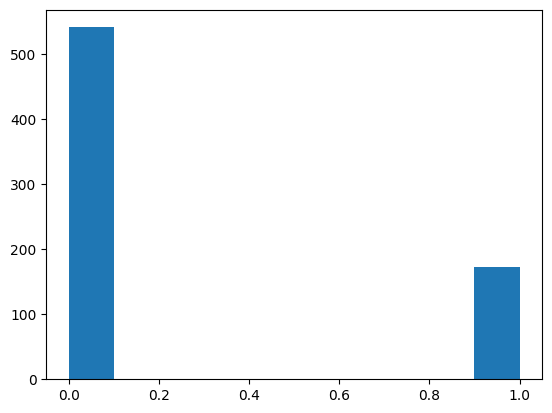

In [394]:
plt.hist(y_pred);

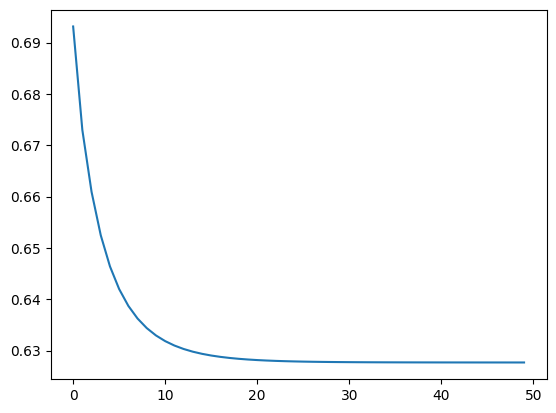

In [396]:
plt.plot(log_model.loss_history);